In [23]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import sklearn
from sklearn import metrics
from data_utils import load_dataset, core_metrics, map_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import plotly.io as pio
# set this to 'jupyterlab' for interactive
pio.renderers.default = "png" 

In [2]:
X_train, X_test, y_train, y_test, X_scaler = load_dataset(categorize_bedrooms=True,scale=True,one_hot=True)

X Columns: {} Index(['date', 'latitude', 'longitude', 'area', 'pets', 'furnished',
       'unit_type_apartment', 'unit_type_condo', 'unit_type_house',
       'unit_type_townhouse', 'bedrooms_0.0', 'bedrooms_1.0', 'bedrooms_2.0',
       'bedrooms_3.0', 'bedrooms_4.0', 'bedrooms_5.0', 'bedrooms_6.0',
       'bedrooms_7.0', 'bedrooms_8.0'],
      dtype='object')
X Shape: (306414, 19)
y Shape: (306414, 1)


In [12]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu',input_shape=[len(X_train.keys())], kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(1),
])

In [13]:
optimizer = tf.keras.optimizers.RMSprop(0.005)
#optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [14]:
model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               5120      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 54,657
Trainable params: 54,657
Non-trainable params: 0
__________________________________________________

In [16]:
EPOCHS = 100
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    x=X_train, y=y_train, batch_size=2048,
    validation_data = (X_test,y_test),
    epochs=EPOCHS, verbose=1,
    callbacks=[early_stop])

Train on 245131 samples, validate on 61283 samples
Epoch 1/100
245131/245131 [==============================] - 9s 35us/sample - loss: 601.7363 - mae: 601.3226 - mse: 794956.6250 - val_loss: 481.0102 - val_mae: 480.6228 - val_mse: 457744.6562
Epoch 2/100
245131/245131 [==============================] - 6s 24us/sample - loss: 468.5306 - mae: 468.1333 - mse: 421110.9688 - val_loss: 501.5774 - val_mae: 501.1894 - val_mse: 492982.8750
Epoch 3/100
245131/245131 [==============================] - 5s 21us/sample - loss: 461.1917 - mae: 460.7849 - mse: 409940.4688 - val_loss: 445.2351 - val_mae: 444.8289 - val_mse: 408194.9375
Epoch 4/100
245131/245131 [==============================] - 6s 26us/sample - loss: 454.2833 - mae: 453.8544 - mse: 400273.2812 - val_loss: 482.0843 - val_mae: 481.6543 - val_mse: 454914.9062
Epoch 5/100
245131/245131 [==============================] - 8s 34us/sample - loss: 446.4810 - mae: 446.0196 - mse: 388277.1562 - val_loss: 455.3608 - val_mae: 454.8891 - val_mse: 4

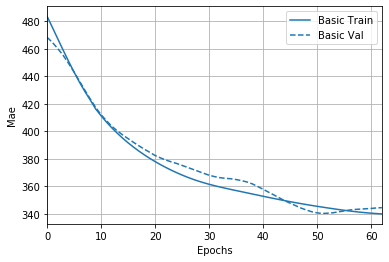

In [17]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")

Using cached coordinates


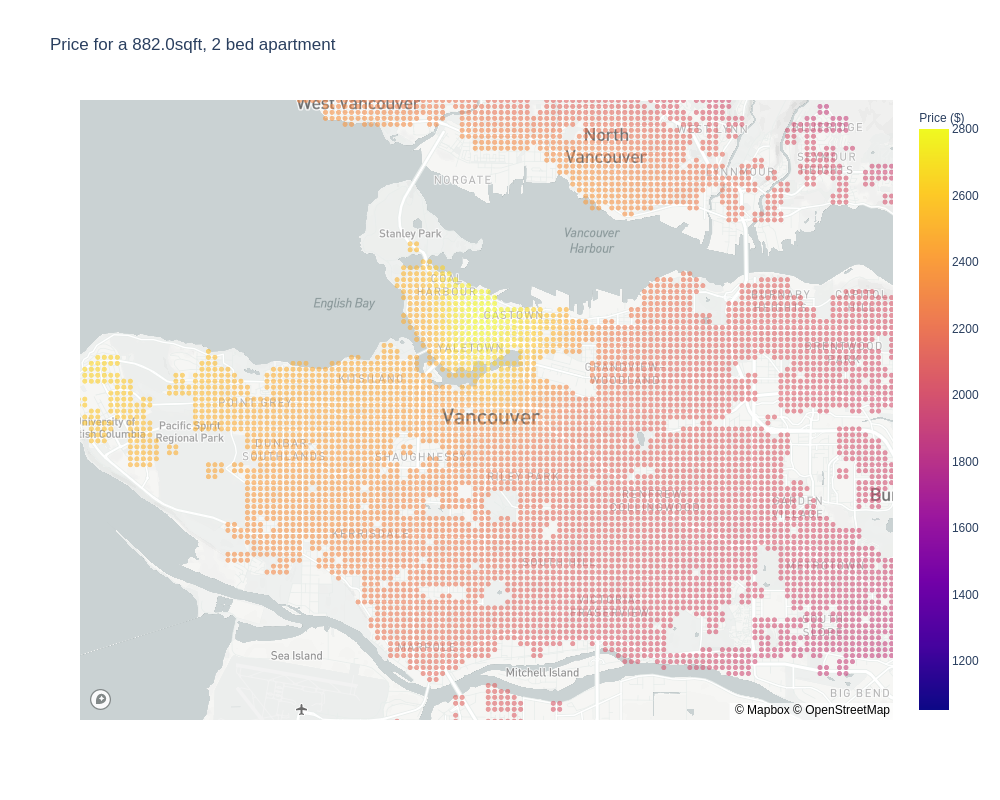

In [24]:
fig = map_model(X_train,model,scaler=X_scaler)
fig.show(height=800,width=1000)